<div>Machine Learning 2019-2020 DIC-1<br/><h3>Mme Diop</h3></div>
<h1 ALIGN="center">RAPPORT DE TP N<sup><u>o</u></sup>1: EXERCICE 1</h1>


<div align="center" style="background-color: blue; color: white">
<h4>Abdou Yaya Sadiakhou</h4> 
<b>élève-ingénieur à l'Ecole Polytechnique de Thiès(<a href="www.ept.sn" style="background-color: red">EPT</a>)</b></div>

<img src='img/ml_summary.png'/>

<div style="font-family: courrier"><strong><u>Exercice 1</u></strong> Equation Normale

Considérons l’équation de prédiction d’un modèle de régression linéaire suivante:

ŷ = h<sub>θ</sub>(x) = θ<sup>T</sup>.x = θ<sub>0</sub> + θ<sub>1</sub>x<sub>1</sub> + ... + θ<sub>n</sub>x<sub>n</sub>

où θ est le vecteur des paramètres du modèle, θ<sup>T</sup>
transposé de θ, x vecteur des valeurs d’une observation, θ<sup>T</sup>.x est le produit scalaire de θ<sup>T</sup> et x et h<sub>θ</sub> est la fonction hypothèse utilisant les paramètres θ.</div>

<pre>1. Pour tester ce modèle, générer les données à l’allure linéaire suivante

              y = 4 + 3x + bruit gaussien

où x est un jeu de données aléatoires

In [29]:
import numpy as np
import pandas as pd
import random
import time
import functools

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [30]:
def generer_jeux_donnees(X):
    # random.normal() permet de generer des donnees suivant une 
    # distribution gaussienne
    y = 4 + 3 * X + np.random.normal(0, 1, (X.shape[0],X.shape[1]))
    return y

In [31]:
taille = 100
X =  np.random.randn(taille, 1)

In [32]:
y = generer_jeux_donnees(X)

In [33]:
X.shape

(100, 1)

In [34]:
y.shape

(100, 1)

<pre>2. Nous souhaitons entraîner le modèle en utilisant la librairie Numpy et la fonction coût suivante: </pre>

$$MSE(x, h_\theta)=\frac{1}{m}\sum_{i=0}^m(\theta^T.x^i - y^i)^2$$

<div style="font-family: courrier">
$$ où\ la\ solution\ analytique\ de\ la\ valeur\ \hat{\theta}\ qui\ minimise\ la\ fonction\ coût\ est\ donnée\ par\ l’équation\ normale\ suivante$$
    <br/>
    $$ \hat{\theta} = (X.X)^{-1}.X^T.y $$
    <br/>
    avec y le vecteur des valeurs cibles y<sup>1</sup> à y<sup>m</sup>
</div>

<img src="img/normal_eq.png"/>
<br/>
<h1> en posant &nabla;<sub>&theta;</sub>J(&theta;)=0</h1> <br/><b>on a</b>:
 <h1>$$ \hat{\theta} = (X.X)^{-1}.X^T.y $$</h1>

In [35]:
# Calculer θ à l’aide de l’équation normale.
# a l'aide d'un decorateur calculons le temps d'execution de l'algo de calcu;
def time_decorator(func):
    @functools.wraps(func)
    def wrapper_time(*args, **kwargs):
        debut = time.perf_counter()
        val = func(*args, **kwargs)
        fin = time.perf_counter()
        exec_time = fin - debut
        print("|{:>20}:{:>10.5f} secondes".format("temps d'execution", exec_time))
        return val
    return wrapper_time

@time_decorator
def get_theta(X, y):
    """fonction qui retourne theta"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

(a) Calculer θ à l’aide de l’équation normale.

<img src="img/get_thetas.jpg"/>

In [36]:
# pour le coefficient directeur de la droite de regression
get_theta(X, y)

|   temps d'execution:   0.00005 secondes


array([[2.6178652]])

In [37]:
# En ajoutant un biais (vecteur de 1) get_theta renvoie le
# coefficient directeur et l'ordonnée à l'origine
X_b = np.c_[np.ones((100, 1)), X]

In [38]:

get_theta(X_b, y)

|   temps d'execution:   0.00016 secondes


array([[3.98179067],
       [3.10256448]])

(b) En déduire le temps de calcule et les paramètres θ de ce modèle.

<p style="color: green">Fonction d'affichage des paramètres et du temps d'execution</p>

In [39]:
def affiche_params(X, y):
    print('-'*41)
    print("{:-^41}".format("paramètres du modele"))
    print('-'*41)
    num_par = X.shape[1]
    global theta
    theta = get_theta(X, y)
    for i in range(num_par):
        print("|{:>20}:{:>10.3f}".format("theta_%d"%i, theta[i][0]))
    print('-'*41)
    print('-'*41)

In [40]:
affiche_params(X_b, y)

-----------------------------------------
----------paramètres du modele-----------
-----------------------------------------
|   temps d'execution:   0.00030 secondes
|             theta_0:     3.982
|             theta_1:     3.103
-----------------------------------------
-----------------------------------------


<p style="font-size: 24px"><u><b>interprétation:</b></u></p>
 <br/>
<div style="color: blue; font-family: courrier">Comme on peut voir l'approximation est perturbée par le bruit gaussien</div>
<p>Cependant l'approximation est assez réussie et le temps d'execution est acceptable</p>

(d) Réaliser des prédictions du modèles

<p style="color: green">Fonction de prediction</p>

In [41]:
def predire(X_test, theta):
    y_pred = X_test.dot(theta)
    return y_pred

In [42]:
def tester_avec(taille):
    X_test = np.zeros((taille, 1))
    for i in range(taille):
        X_test[i] = int(input(str(i+1)+"e valeur"+" :"))
    return X_test

In [43]:
X_test = np.zeros((5, 1))
liste = [0, 2, 5, 7, 10]
for i in range(len(liste)):
    X_test[i] = liste[i]
X_test_biais = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred = predire(X_test_biais, theta)
y_reel = generer_jeux_donnees(X_test)


In [44]:
def affiche_predict(y_pred, X_test):
    print('-'*41,"\n{:-^41}".format("predictions"))
    print('-'*41)
    print()
    print("|{:>10}|{:>10}|{:>10}".format('X_test', 'y_pred', 'y_reel'))
    print('-'*41)
    i = 0
    for (y_p, y_r) in zip(y_pred, y_reel):
        print("|{0:>10.3f}|{1:>10.3f}|{2:>10.3f}".format(X_test[i][0], y_p[0], y_r[0]))
        i += 1

In [45]:
affiche_predict(y_pred, X_test)

----------------------------------------- 
---------------predictions---------------
-----------------------------------------

|    X_test|    y_pred|    y_reel
-----------------------------------------
|     0.000|     3.982|     3.971
|     2.000|    10.187|     9.243
|     5.000|    19.495|    20.668
|     7.000|    25.700|    24.066
|    10.000|    35.007|    34.213


(e) Représenter graphiquement les prédicitions du modèle.

<p style="color: green">Fonction de representation</p>

In [46]:
# representation
def plot_graphe_ML(titre="Representation graphique du modele lineaire"):
    fig, ax = plt.subplots(figsize=(10, 8))
    f_1 = plt.plot(X, y, 'y^', markersize=8)
    f_2 = plt.plot(X_test, y_pred, color="g", Marker="o",linestyle="--", linewidth=4)
    plt.axis([-0.05, 2.05, 0, 13])
    plt.xlabel("axe X")
    plt.xlabel("axe y")
    plt.title(titre)
    ax.legend(['points', 'predictions'], loc = "upper left", prop={'size': 15})

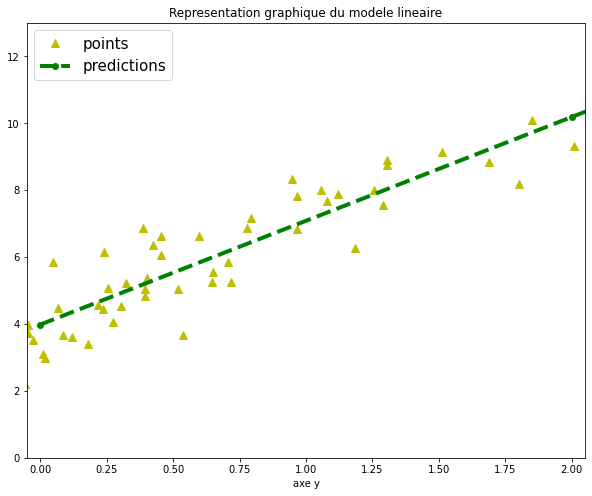

In [47]:
plot_graphe_ML()

(f ) Maintenant générer des données non linéaires.

<img src="img/lin_vs_non_lin.jpg"/>

In [48]:
# donnees non-lineaires
def generer_data_non_lineaire(X):
    """renvoi un jeu de données non lineaire"""
    f = lambda X: 3 * np.cos(1.5 * np.pi * X) + 2 * np.cos( 5 * np.pi * X )
    y = f(X) + np.random.randn(X.shape[0]) * 0.1 + 4
    return y

In [49]:
X = np.sort(np.random.rand(100)) * 4
y = generer_data_non_lineaire(X)
# entrainer 

In [50]:
X.shape

(100,)

In [51]:
y.shape

(100,)

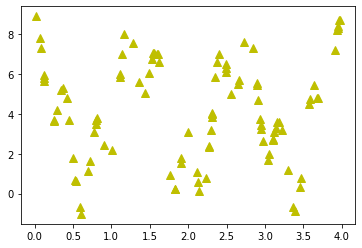

In [52]:

f_1 = plt.plot(X, y, 'y^', markersize=8)

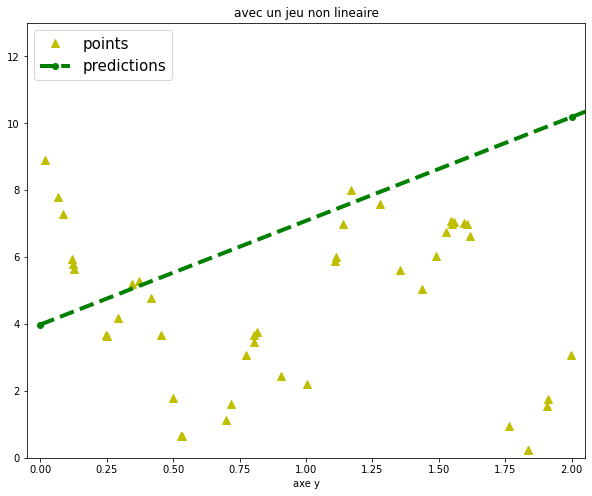

In [53]:
plot_graphe_ML(titre="avec un jeu non lineaire")

<p style="font-size: 24px"><u><b>interprétation:</b></u></p>
 <br/>
Le modele n'est pas performant avec des donnees non lineaire

3. On considère pour la suite la libraire Scikit-Learn.

<pre>
   (a) Donner le code équivalent de la régression linéaire               pour le modèle précédent.</pre>

In [80]:
# code equivalent avec scikit
from sklearn.linear_model import LinearRegression

#X = np.linspace(0, 10, 100)
taille=100
X =  np.random.randn(taille, 1)
y = generer_jeux_donnees(X)
X_b = np.c_[np.ones((taille, 1)), X]

In [81]:
# entrainement
model = LinearRegression(fit_intercept=True)
model.fit(X_b, y)

LinearRegression()

In [82]:
# parametres
model.intercept_[0], model.coef_[0][1]

(3.973715945151775, 3.0119475312064967)

In [89]:
# test
X_test = np.zeros((6, 1))
liste = [-5, 0, 2, 5, 7, 10]
for i in range(len(liste)):
    X_test[i] = liste[i]
X_test_biais = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test = generer_jeux_donnees(X_test)
y_pred = model.predict(X_test_biais)


#X_test=np.linspace(0,10, 5)
#y_pred=model.predict(X_test[:, np.newaxis])

In [90]:
# gr

(0.0, 15.0)

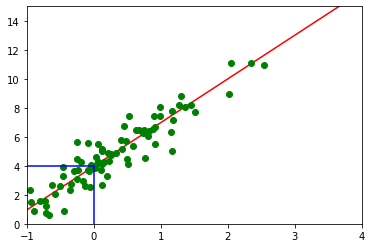

In [102]:
plt.plot(X_test, y_pred, color='r')
plt.plot(X, y, 'go')
plt.plot([-1, 0], [4, 4], 'b')
plt.plot([0, 0], [0, 4], 'b')
plt.xlim([-1, 4])
plt.ylim([0, 15])

In [104]:
print("-"*41)
print("{:-^41}".format('parametres'))
print("-"*41)
print("| theta_0:{:>10.3f}".format(model.intercept_[0]))
print("| theta_1:{:>10.3f}".format(model.coef_[0][1]))


-----------------------------------------
---------------parametres----------------
-----------------------------------------
| theta_0:     3.974
| theta_1:     3.012


<pre>(b) Générer un jeu de données non linéaire avec l’équation           qui suit</pre>
$$y = 0.5x_1^{2} + 1.0x_1 + 2.0 + bruit\ gaussien$$

<img src="img/poly.png"/>

In [105]:
# y = 0.5 * x ^ 2 + x + 2.0 + bruit_gaussien
def polynome_y(taille, X, add_noise = False):
    if add_noise:
        noise = np.random.rand(taille, 1)
        y = 0.5 *( X ** 2) + X + 2 + noise
        return y
    y = 0.5 * (X ** 2) + X + 2
    return y

In [106]:
# generation
taille = 100
X = -3 + np.random.rand(taille, 1)*3.5
y = polynome_y(taille, X, add_noise=True)

In [107]:
y.shape

(100, 1)

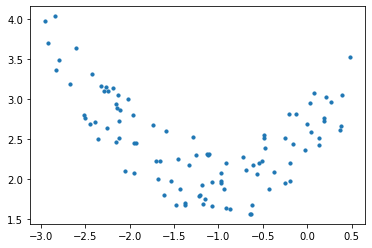

In [108]:
plt.scatter(X, y, s=10)

<pre>(c) Implementer et tester sur des données aléatoires la régression polynomiale : faire une polynomialisation (tranformation des données d’apprentissage : ajout des puissances de chacune des variables comme nouvelles variables) avec  PolynomialFeatures, puis entraîner un modèle linéaire sur 
ce nouvel ensemble de données.</pre>

In [109]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [110]:

poly_feature = PolynomialFeatures(degree=2)
X_p = poly_feature.fit_transform(X)

In [112]:
# entrainons un model lineaire sur le dataset
model = LinearRegression()
model.fit(X_p, y)

LinearRegression()

In [113]:
y_pred = model.predict(X_p)

RMSE_du_modele: 0.286
r_2_du_modele: 0.735


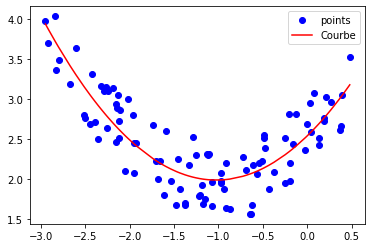

In [114]:
print('RMSE_du_modele: {:>5.3f}\nr_2_du_modele: {:>5.3f}'.format(
                                            np.sqrt(mean_squared_error(y, y_pred)), 
                                            r2_score(y, y_pred)))
plt.plot(X, y, 'bo', label='points')
plt.plot(sorted(X[:, 0]), y_pred[np.argsort(X[:, 0])], 'r', label='Courbe')
plt.legend()
plt.show()

<img src='img/r_squares.jpg'/>

In [115]:
def predictions(X, y, degre):
    pol_F = PolynomialFeatures(degre=degre)
    X_pol = pol_F.fit_transform(X)
    model = LinearRegression().fit(X_pol, y)
    return model.predict(X_pol)
    

In [116]:

poly_feature = PolynomialFeatures(degree=2)
X_p = poly_feature.fit_transform(X)

### entrainons un model lineaire sur le dataset

In [117]:
model = LinearRegression()
model.fit(X_p, y)

LinearRegression()

In [118]:
y_pred = model.predict(X_p)

In [119]:
def predictions(X, y, degre):
    pol_F = PolynomialFeatures(degree=degre)
    X_pol = pol_F.fit_transform(X)
    model = LinearRegression().fit(X_pol, y)
    return model.predict(X_pol)
    

Degrés: 1	RMSE: 0.523	R2: 0.116
Degrés: 2	RMSE: 0.286	R2: 0.735
Degrés: 8	RMSE: 0.277	R2: 0.751
Degrés: 16	RMSE: 0.268	R2: 0.767
Degrés: 30	RMSE: 0.265	R2: 0.772


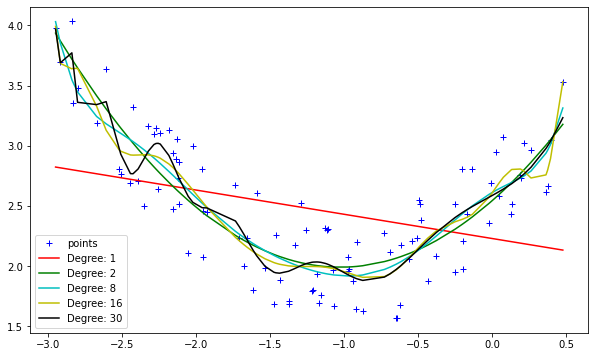

In [120]:
degrees = [1, 2, 8, 16, 30]
cs = ['r', 'g', 'c', 'y', 'k']

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b+', label='points')

for degree, c in zip(degrees, cs):
    # Make predictions for degree
    preds = predictions(X, y, degree)
    # Plot
    plt.plot(sorted(X[:, 0]), preds[np.argsort(X[:, 0])], c, label='Degree: {}'.format(degree))
    # Print Metrics
    print('Degrés: {}\tRMSE: {:.3f}'
          '\tR2: {:.3f}'.format(degree, np.sqrt(mean_squared_error(y, preds)), r2_score(y, preds)))

plt.legend()
plt.show()

# Plus le degré du polynome est elevé plus le modele est performant à l'apprentissage. Mais cependant il est souvent mauvais lors du test (overfitting!)

<pre>4. Les courbes d’apprentissage sont des diagrammes représentant les résultats obtenus par le modèle sur le jeu d’entraînement et le jeu de validation en fonction de la taille du jeu d’entraînement. Pour générer ces graphiques, il suffit d’entraîner le modèle plusieurs fois sur des sous-ensembles de différentes tailles du jeu d’entraînement.
(a) Définir une fonction qui trace les courbes d’apprentissage,
</pre>

In [63]:
# Courbes d'apprentissage

In [64]:
from sklearn.model_selection import train_test_split

# fonction 
def visualiser_ca(model, X, y, split=0.2, metric=mean_squared_error):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=split)
    train_errors, test_errors = [], []
    for train_size in range(1, len(x_train)):
        model.fit(x_train[:train_size], y_train[:train_size])
        preds_train = model.predict(x_train[:train_size])
        
        y_pred = model.predict(x_test)
        
        train_errors.append(metric(y_train[:train_size], preds_train))
        test_errors.append(metric(y_test, y_pred))
        
    # representation
    plt.plot(np.sqrt(train_errors), 'r--*', label='Erreurs entrainement')
    plt.plot(np.sqrt(test_errors), 'b--+', label='Erreurs test')
    plt.ylabel('RMSE')
    plt.xlabel('Training set size')

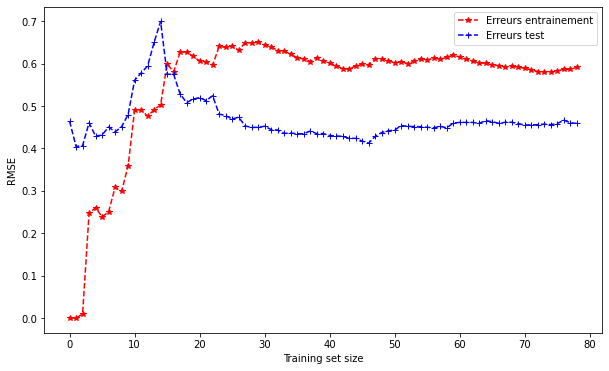

In [65]:
plt.figure(figsize=(10, 6))
visualiser_ca(model, X, y)
plt.legend()
plt.show()

<pre>(b) Générer les courbes d’apprentissage pour un modèle de régression linéaire simple et pour un modèle polynomial</pre>

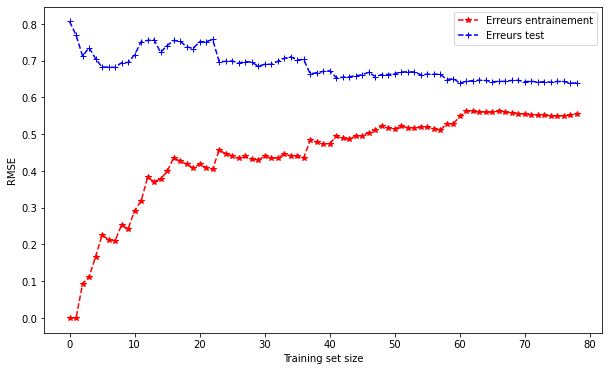

In [67]:
# Essayons avec un model lineaire degree=1
from sklearn.pipeline import Pipeline
"""
Pipeline permet de combiner PolynomialFeatures et un model de regression
quelconque
"""
model = Pipeline([
    ('pol_F', PolynomialFeatures(degree=1, include_bias=False)),
    ('linearModel', LinearRegression())
])
plt.figure(figsize=(10, 6))
visualiser_ca(model, X, y)
plt.legend()
plt.show()

In [ ]:
# regularization

# def build_model(regression_fn,
#                 name_of_y_col,
#                 names_of_x_cols,
#                 dataset,
#                 test_frac=0.2,
#                 preprocess_fn=None,
#                 show_plot_Y=False,
#                 show_plot_scatter=False):
#     X = dataset[names_of_x_cols]
#     Y = dataset[name_of_y_col]
#     if preprocess_fn is not None:
#         X = preprocess_fn(X)
#     x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
#     model = regression_fn(x_train, y_train)
 
#     y_pred = model.predict(x_test)
#     print('Training score\t\tTesting_score')
#     print(f'%.5f\t\t\t%.5f'%(model.score(x_train, y_train),
#                          r2_score(y_test, y_pred)))
    
#     if show_plot_Y:
#         fig, ax = plt.subplots(figsize=(12, 10))
#         plt.plot(y_pred, '-o', label='predites')
#         plt.plot(y_test.values, '--o', label='actuelles')
#         plt.legend()
#         plt.ylabel(name_of_y_col)
#         plt.show()
    
#     if show_plot_scatter:
#         fig, ax = plt.subplots(figsize=(12, 8))
#         plt.scatter(x_test, y_test, 'b')
#         plt.plot(x_test, y_pred, 'r')
#         plt.legend(['ligne des predits', 'données observées'])
#         plt.show()
    
#     return {
#         'training_score': model.score(x_train, y_train),
#         'test_score': r2_score(y_test, y_pred)
#     }


<pre>5. Trouver la polynomialisation qui permet d’éviter le sur-apprentissage tout en garantissant un apprentissage s’appelle la régularisation d’un modèle. Parmi les modèles de régularisation figure la régression Ridge ou régularisation de Tikhonov, la régression LASSO (least Absolute Shrinkage and Selection Operator Regression), l’Elastic Net ou le Early Stopping. Pour chacune de ces méthodes
(a) rappeler l’idée générale,
(b) rappeler la fonction coût,
(c) implémenter et tester le modèle.
</pre>

<p style="font-size:30px;color:"><u><b>Régularisation :</b></u></p> 

Cette technique clé de machine learning vise à limiter le « surapprentissage » (overfitting) et à contrôler l’erreur de type variance pour aboutir à de meilleures performances.
# MOINDRES CARRÉES ORDINAIRE:
<div style="font-family: callipso">
Les MCO ne considèrent pas quelle variable indépendante est plus importante que les autres. Il se contente de trouver les coefficients pour un ensemble de données donné. En bref, il n'y a qu'un seul ensemble de bêtas à trouver, ce qui donne la "somme résiduelle de carrés"(RSS) la plus faible 
</div>
On essaye de miniser la fonction de cout suivant:
<table>
    <fieldset>
    <td>
$$MCO(x, h_\theta)=\sum_{i=0}^m(\theta^T.x^i - y^i)^2$$
    </td>
    </fieldset>
</table>

<div style="font-family: callipso; background-color: yellow">
    La question devient alors : "Un modèle avec le RSS le plus bas est-il vraiment le meilleur modèle ?
</div>

# LASSO

<div style="font-family: callipso">
    
Les variables X<sub>i</sub>  n’étant pas toutes pertinentes, l’objectif est d’éliminer les variables inutiles et uniquement celles-ci. L’idée du LASSO est donc non pas de faire une régression linéaire classique (multiple), mais une régression régularisée qui rend nuls certains coefficients de l’estimation de θ.
</div>
<br/>
<div style="font-family: callipso; text-align:left">
 En d’autres termes, cette méthode d’estimation introduite par Tibshirani (1996) est définie comme étant un minimiseur du critère des moindres carrés pénalisés par la norme l<sub>1</sub> du vecteur θ. On parle de pénalité l<sub>1</sub> ou de pénalité LASSO
<h4><u>Fonction coût:</u></h4>
<table>
    <fieldset>
    <td>
     
$$L(\theta; \lambda) =  \lVert Y - X\theta \rVert_2^{2} + \lambda \lVert \theta \rVert_1
\\
=\sum_{i=1}^n(\theta^T.x^i - y^i)^2 + \lambda\sum_{j=1}^p|{\theta^j}|$$
     </td>
     </fieldset>
 </table>
<br/>
ou le premier terme est le MCO et le second la pénalité
</div>
<br/>
<u>Remarques</u>
<ul type="radio">
<li> &lambda; &ge; 0 <i>paramètre de pénalité</i> </li>
<li> Le lasso est utilisé dans des problèmes de grande dimension (n &lt; p : où le nombre d'individus est inférieur au nombre de variables), un cas où des méthodes plus classiques ne fonctionnent pas.</li>
<li>La très grande dimension : lorsque notamment la dimension est trop élevée (p très grand comparé à n) ou le vrai vecteur &theta; n'est pas suffisamment creux (trop de variables d'intérêts), le lasso ne pourra pas retrouver l'ensemble de ces variables d'intérêts</li>
</ul>

# RIDGE
<div style="font-family: callipso; text-align:left">
La régularisation de Tikhonov est la méthode de régularisation la plus utilisée pour la résolution de problèmes qui ne sont pas bien posés ainsi que pour les problèmes inverses. Elle a été imaginée par le mathématicien russe Andreï Nikolaïevitch Tikhonov. En statistique, la méthode est également connue sous le nom de régression d'arête (ridge regression).
</div>
<h4><u>Fonction coût:</u></h4>
<table>
    <fieldset>
    <td>
     
$$L(\theta; \lambda) =  \lVert Y - X\theta \rVert_2^{2} + \alpha \lVert \theta \rVert_2
\\
=\sum_{i=1}^n(\theta^T.x^i - y^i)^2 + \alpha\sum_{j=1}^p( \theta^j)^{2}$$
     </td>
     </fieldset>
 </table>
<br/>
<u>Remarques</u>
<ul>
<li>L’estimateur ridge n’est pas invariant par renormalisation des vecteurs x<sup>i</sup>, il est préférable de normaliser les vecteurs avant de minimiser le critère.</li>
<li>La constante &theta;<sub>0</sub> n’intervient pas dans la pénalité, sinon, le choix de l’origine pour Y aurait une influence sur l’estimation de l’ensemble des paramètres.</li>
</ul>
    $$\alpha→0,\ \hat{\theta}_{ridge}→\hat{\theta}_{MCO};
    \\
    \alpha→∞,\ \hat{\theta}_{ridge}→0$$

# Elastic Net
<div style="font-family: callipso; text-align:left">
En statistique et, en particulier, dans l'ajustement des modèles de régression linéaire ou logistique, le filet élastique (ou Elastic Net en anglais) est une méthode de régression régularisée qui combine linéairement les pénalités L<sub>1</sub> et L<sub>2</sub> des méthodes LASSO et Ridge.
<p>
Elastic Net est d'abord apparu suite à la critique du lasso, dont la sélection des variables peut être trop dépendante des données et donc instable. La solution consiste à combiner les pénalités de la régression de crête (ridge en anglais) et du lasso pour obtenir le meilleur des deux . Elastic Net vise à minimiser la fonction de cout suivante :    
</p>
<table>
    <th>
    $$ L_{enet}(\theta, \lambda, \alpha) = \frac{\sum_{i=1}^n(y^i-x^i\theta)^2}{2n} + \lambda(\frac{1-\alpha}{2}\sum_{j=1}^p(\theta^j)^2 + \alpha\sum_{j=1}^p|\theta^j|)$$
    </th>
</table>
</div>
<br>
<u>Remarques:</u>
<ul>
<li>Si &alpha; = 0 (Ridge) si &alpha; = 1 (LASSO) </li>
</ul>